In [ ]:
from pump_plot import *
from pump_condition import *
import numpy as np

In [2]:
mendoza_test = PumpCondition('DVMX-4x6x9-performance-test')

In [3]:
p1={"s":0.996*u.dimensionless,"n":3160*u.revolutions_per_minute,"q":280.9*u.meter**3/u.hour,"h":416.8*u.meter_H2O,"N":538.8*u.horsepower}
p2={"s":0.996*u.dimensionless,"n":3160*u.revolutions_per_minute,"q":249.6*u.meter**3/u.hour,"h":468.2*u.meter_H2O,"N":517.1*u.horsepower}
p3={"s":0.996*u.dimensionless,"n":3160*u.revolutions_per_minute,"q":189.6*u.meter**3/u.hour,"h":548.3*u.meter_H2O,"N":456.2*u.horsepower}
p4={"s":0.996*u.dimensionless,"n":3160*u.revolutions_per_minute,"q":184.4*u.meter**3/u.hour,"h":553.1*u.meter_H2O,"N":451.1*u.horsepower}
p5={"s":0.996*u.dimensionless,"n":3160*u.revolutions_per_minute,"q":165.4*u.meter**3/u.hour,"h":572.6*u.meter_H2O,"N":425.9*u.horsepower}
p6={"s":0.996*u.dimensionless,"n":3160*u.revolutions_per_minute,"q":137.0*u.meter**3/u.hour,"h":595.4*u.meter_H2O,"N":386.8*u.horsepower}
p7={"s":0.996*u.dimensionless,"n":3160*u.revolutions_per_minute,"q":43.3*u.meter**3/u.hour,"h":633.4*u.meter_H2O,"N":253.7*u.horsepower}

In [4]:
mendoza_test.add_curve_point(p1)
mendoza_test.add_curve_point(p2)
mendoza_test.add_curve_point(p3)
mendoza_test.add_curve_point(p4)
mendoza_test.add_curve_point(p5)
mendoza_test.add_curve_point(p6)
mendoza_test.add_curve_point(p7)

In [5]:
normalized = mendoza_test.change_conditions(3160*u.revolutions_per_minute, (0.996*1.03)*u.dimensionless)

In [6]:
dutypoint1 = normalized.find_duty_point(814*u.gallon/u.minute, 1680*u.foot_H2O)
dutypoint2 = normalized.find_duty_point(714*u.gallon/u.minute, 1880*u.foot_H2O, 'AA')

final n: 3059.05 revolutions_per_minute
final q: 814.00 gallon / minute
final h: 1680.00 foot_H2O
final e: 0.8282 dimensionless
final N: 428.31 horsepower
count: 34
final n: 3154.32 revolutions_per_minute
final q: 714.00 gallon / minute
final h: 1880.00 foot_H2O
final e: 0.8054 dimensionless
final N: 432.50 horsepower
count: 14


In [ ]:
curve_range = np.linspace((750*3.023), 3550, 500)
curve_data = [mendoza_test.change_conditions(n*u.revolutions_per_minute, (0.996*1.03)*u.dimensionless) for n in curve_range]
colors = PumpPlot('colors', units=units_US, show_test_dots=False, efficiency_colorbar=True, color_map_type='Greens')
for a in curve_data:
    colors.add_condition(a)
colors.add_condition(dutypoint1)
colors.add_condition(dutypoint2)
colors.h_curve('Windsor HP Pump Curve Family with Efficiency', 'greensg3.png', custom_colorbar_ticks=[.6, .7, .75, .76, .77, .78, .79, .80, .81, .82, .83])


<Figure size 432x288 with 0 Axes>

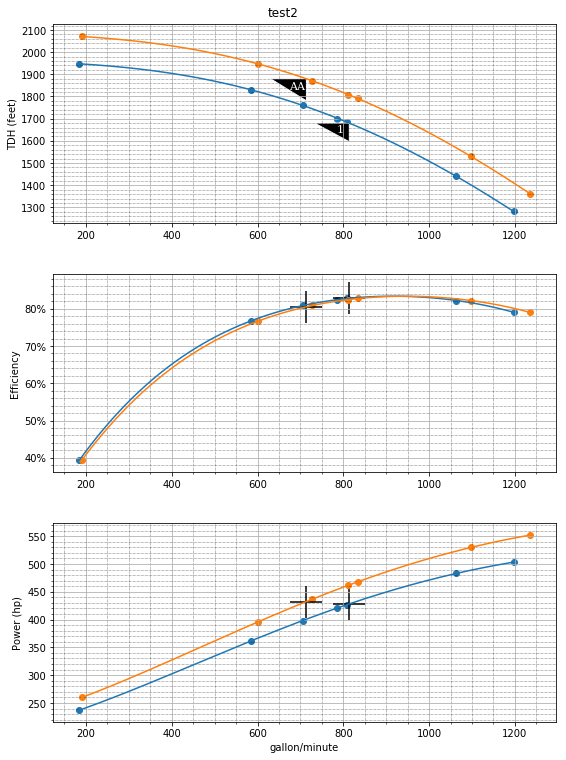

In [9]:
colors2 = PumpPlot('colors', units=units_US, show_test_dots=True, efficiency_colorbar=False)
colors2.add_condition(dutypoint1)
colors2.add_condition(dutypoint2)
colors2.all_curves('test2', 'test2.png')
